In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import equilibrator_api
from equilibrator_api import ComponentContribution, parse_reaction_formula,Pathway,Bounds, Q_, ureg
ureg.default_format = '.2f'

print('equlibrator_api version:', equilibrator_api.__version__)

Fragments already downloaded
Fragments already downloaded
equlibrator_api version:0.2.5


## Conditions
pH 7.5, ionic strength 0.25 M, and room temperature 298.15 K (25 degree)

In [5]:
p_h = Q_('7.5')
t = Q_('298.15K')
ionic = Q_('0.25M')

## 1 Homoserine cycle
Upper bound for FA is set to 0.5mM.

In [6]:
HS_rxns = pd.read_csv('HomS_Rxns.csv')
HS_bounds = Bounds.from_csv('HomS_comp_conc.csv')
HS_fluxes = np.ones(8)

HSRxns = list(map(parse_reaction_formula, HS_rxns['RxnFormula']))
HomSer = Pathway(HSRxns,HS_fluxes, bounds=HS_bounds,p_h=p_h,ionic_strength=ionic,temperature=t)
HS_mdf = HomSer.calc_mdf()

In [7]:
print('Homoserine cycle MDF:', HS_mdf.mdf)

Homoserine cycle MDF:12.53 kilojoule / mole


In [8]:
HS_mdf.compound_df

,compound,concentration,shadow_price,lower_bound,upper_bound
0,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.00 molar,3.028861e-17,1.00 molar,1.00 molar
1,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",0.01 molar,0.000000e+00,0.01 molar,0.01 molar
2,"Compound(id=10, inchi_key=XTWYTFMLZFPYCI-KQYNX...",0.00 molar,0.000000e+00,0.00 molar,0.00 molar
3,"Compound(id=11, inchi_key=BAWFJGJZGIEFAR-NNYOX...",0.00 molar,-2.220446e-16,0.00 molar,0.00 molar
4,"Compound(id=12, inchi_key=NBIIXXVUZAFLBC-UHFFF...",0.01 molar,-3.028861e-17,0.01 molar,0.01 molar
5,"Compound(id=13, inchi_key=BOPGDPNILDQYTO-NNYOX...",0.00 molar,2.220446e-16,0.00 molar,0.00 molar
6,"Compound(id=15, inchi_key=RGJOEKWQDUBAIZ-IBOSZ...",0.00 molar,-2.220446e-16,0.00 molar,0.00 molar
7,"Compound(id=18, inchi_key=QGZKDVFQNNGYKY-UHFFF...",0.01 molar,1.110223e-16,0.01 molar,0.01 molar
8,"Compound(id=22, inchi_key=KPGXRSRHYNQIFN-UHFFF...",0.00 molar,-8.923987e-01,0.00 molar,0.00 molar
9,"Compound(id=23, inchi_key=ZSLZBFCDCINBPY-ZSJPK...",0.00 molar,2.220446e-16,0.00 molar,0.01 molar


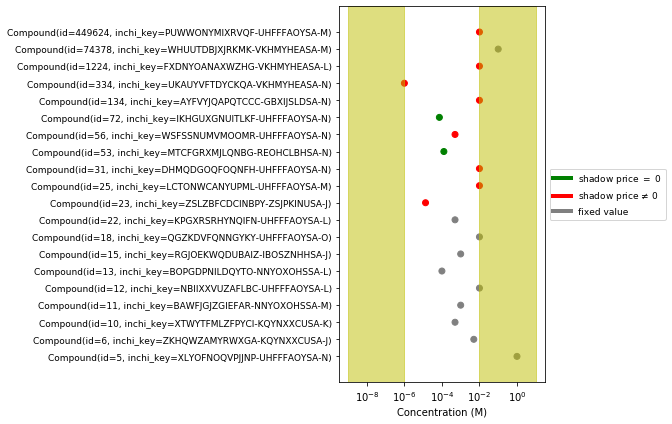

In [9]:
# HS_mdf.compound_df.to_excel('HomS_comp.xlsx')
HS_comp_plot = HS_mdf.compound_plot
# HS_comp_plot.savefig('HomSer_comp.eps')

In [10]:
HS_mdf.reaction_df

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,COCO:R00000,"Compound(id=31, inchi_key=DHMQDGOQFOQNFH-UHFFF...",1.0,-18.88 kilojoule / mole,-1.76 kilojoule / mole,-12.53 kilojoule / mole,0.000000e+00
1,COCO:R00001,"Compound(id=53, inchi_key=MTCFGRXMJLQNBG-REOHC...",1.0,-28.96 kilojoule / mole,-46.07 kilojoule / mole,-28.68 kilojoule / mole,0.000000e+00
2,COCO:R00002,"Compound(id=25, inchi_key=LCTONWCANYUPML-UHFFF...",1.0,-31.76 kilojoule / mole,-14.64 kilojoule / mole,-12.53 kilojoule / mole,1.076013e-01
3,COCO:R00003,"Compound(id=74378, inchi_key=WHUUTDBJXJRKMK-VK...",1.0,29.60 kilojoule / mole,29.60 kilojoule / mole,-12.53 kilojoule / mole,8.923987e-01
4,COCO:R00004,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1.0,-36.30 kilojoule / mole,-36.30 kilojoule / mole,-13.90 kilojoule / mole,0.000000e+00
5,COCO:R00005,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.0,-28.43 kilojoule / mole,-45.55 kilojoule / mole,-38.43 kilojoule / mole,0.000000e+00
6,COCO:R00006,"Compound(id=134, inchi_key=AYFVYJQAPQTCCC-GBXI...",1.0,9.91 kilojoule / mole,-7.21 kilojoule / mole,-12.53 kilojoule / mole,0.000000e+00
7,COCO:R00007,"Compound(id=11, inchi_key=BAWFJGJZGIEFAR-NNYOX...",1.0,-20.55 kilojoule / mole,-3.44 kilojoule / mole,-12.53 kilojoule / mole,1.126119e-16


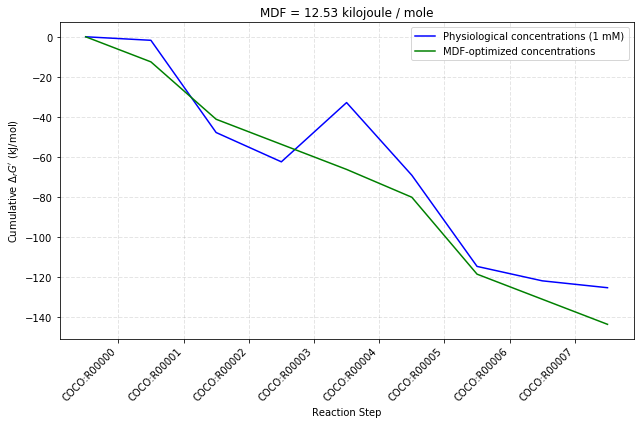

In [11]:
# HS_mdf.reaction_df.to_excel('HomS_Rxn.xlsx')
HS_rxn_plot = HS_mdf.reaction_plot
# HS_rxn_plot.savefig('HomSer_Rxn.eps')

## 2 Serine Cycle
formate + CO2

In [12]:
Ser_rxns = pd.read_csv('SerCyc_Rxns.csv')
Ser_bounds = Bounds.from_csv('SerCyc_comp_conc.csv')
Ser_fluxes = np.ones(12)

SerRxns = list(map(parse_reaction_formula, Ser_rxns['RxnFormula']))
SerCyc = Pathway(SerRxns,Ser_fluxes, bounds=Ser_bounds,p_h=p_h,ionic_strength=ionic,temperature=t)
Ser_mdf = SerCyc.calc_mdf()
print('Serine cycle MDF:', Ser_mdf.mdf)

Serine cycle MDF:8.23 kilojoule / mole


In [13]:
Ser_mdf.compound_df

,compound,concentration,shadow_price,lower_bound,upper_bound
0,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.00 molar,-3.069845e-17,1.00 molar,1.00 molar
1,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",0.01 molar,2.000000e-01,0.01 molar,0.01 molar
2,"Compound(id=8, inchi_key=XJLXINKUBYWONI-NNYOXO...",0.00 molar,-2.000000e-01,0.00 molar,0.00 molar
3,"Compound(id=9, inchi_key=ACFIXJIJDZMPPO-NNYOXO...",0.00 molar,2.000000e-01,0.00 molar,0.00 molar
4,"Compound(id=10, inchi_key=XTWYTFMLZFPYCI-KQYNX...",0.00 molar,-2.000000e-01,0.00 molar,0.00 molar
5,"Compound(id=11, inchi_key=BAWFJGJZGIEFAR-NNYOX...",0.00 molar,-2.557171e-17,0.00 molar,0.00 molar
6,"Compound(id=12, inchi_key=NBIIXXVUZAFLBC-UHFFF...",0.01 molar,-2.000000e-01,0.01 molar,0.01 molar
7,"Compound(id=13, inchi_key=BOPGDPNILDQYTO-NNYOX...",0.00 molar,1.725657e-17,0.00 molar,0.00 molar
8,"Compound(id=15, inchi_key=RGJOEKWQDUBAIZ-IBOSZ...",0.00 molar,4.111941e-19,0.00 molar,0.00 molar
9,"Compound(id=16, inchi_key=CURLTUGMZLYLDI-UHFFF...",0.00 molar,0.000000e+00,0.00 molar,0.00 molar


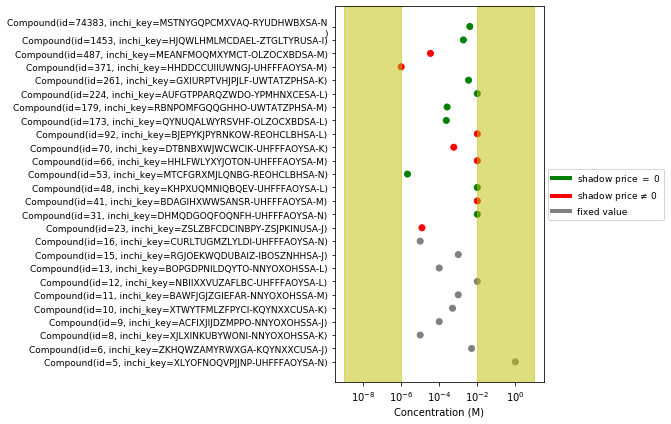

In [14]:
# Ser_mdf.compound_df.to_excel('SerCyc_comp.xlsx')
Ser_comp_plot = Ser_mdf.compound_plot
# Ser_comp_plot.savefig('SerCyc_comp.eps')

In [15]:
Ser_mdf.reaction_df

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,COCO:R00008,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1.0,-3.56 kilojoule / mole,-3.56 kilojoule / mole,-8.23 kilojoule / mole,2.000000e-01
1,COCO:R00009,"Compound(id=224, inchi_key=AUFGTPPARQZWDO-YPMH...",1.0,6.36 kilojoule / mole,6.36 kilojoule / mole,-8.23 kilojoule / mole,2.000000e-01
2,COCO:R00010,"Compound(id=9, inchi_key=ACFIXJIJDZMPPO-NNYOXO...",1.0,-6.59 kilojoule / mole,-6.59 kilojoule / mole,-8.23 kilojoule / mole,2.000000e-01
3,COCO:R00011,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.0,6.57 kilojoule / mole,6.57 kilojoule / mole,-8.23 kilojoule / mole,2.000000e-01
4,COCO:R00012,"Compound(id=53, inchi_key=MTCFGRXMJLQNBG-REOHC...",1.0,-4.24 kilojoule / mole,-4.24 kilojoule / mole,-8.23 kilojoule / mole,2.000000e-01
5,COCO:R00013,"Compound(id=13, inchi_key=BOPGDPNILDQYTO-NNYOX...",1.0,-28.13 kilojoule / mole,-28.13 kilojoule / mole,-8.23 kilojoule / mole,2.557171e-17
6,COCO:R00014,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1.0,-9.69 kilojoule / mole,-9.69 kilojoule / mole,-8.23 kilojoule / mole,0.000000e+00
7,COCO:R00015,"Compound(id=261, inchi_key=GXIURPTVHJPJLF-UWTA...",1.0,-4.08 kilojoule / mole,-4.08 kilojoule / mole,-8.23 kilojoule / mole,0.000000e+00
8,COCO:R00016,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.0,-39.04 kilojoule / mole,-39.04 kilojoule / mole,-11.80 kilojoule / mole,4.104166e-17
9,COCO:R00017,"Compound(id=13, inchi_key=BOPGDPNILDQYTO-NNYOX...",1.0,-26.60 kilojoule / mole,-26.60 kilojoule / mole,-21.26 kilojoule / mole,0.000000e+00


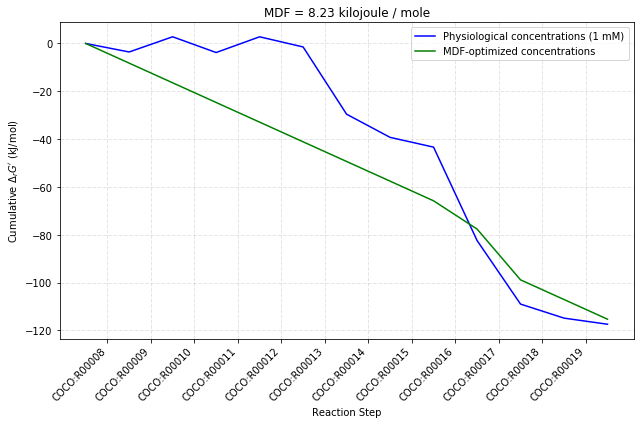

In [16]:
# Ser_mdf.reaction_df.to_excel('SerCyc_Rxn.xlsx')
Ser_rxn_plot = Ser_mdf.reaction_plot
# Ser_rxn_plot.savefig('SerCyc_Rxn.eps')

## 3 The Modified serine cycle
formate + CO2

In [17]:
MSer_rxns = pd.read_csv('MSerCyc_Rxns.csv')
MSer_bounds = Bounds.from_csv('MSerCyc_comp_conc.csv')
MSer_fluxes = np.ones(12)

MSerRxns = list(map(parse_reaction_formula, MSer_rxns['RxnFormula']))
MSerCyc = Pathway(MSerRxns,MSer_fluxes, bounds=MSer_bounds,p_h=p_h,ionic_strength=ionic,temperature=t)
MSer_mdf = MSerCyc.calc_mdf()
print('The modified serine cycle MDF:',MSer_mdf.mdf)

The modified serine cycle MDF:8.93 kilojoule / mole


In [18]:
MSer_mdf.compound_df

,compound,concentration,shadow_price,lower_bound,upper_bound
0,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.00 molar,-2.872779e-18,1.00 molar,1.00 molar
1,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",0.01 molar,2.500000e-01,0.01 molar,0.01 molar
2,"Compound(id=8, inchi_key=XJLXINKUBYWONI-NNYOXO...",0.00 molar,-2.500000e-01,0.00 molar,0.00 molar
3,"Compound(id=9, inchi_key=ACFIXJIJDZMPPO-NNYOXO...",0.00 molar,2.500000e-01,0.00 molar,0.00 molar
4,"Compound(id=10, inchi_key=XTWYTFMLZFPYCI-KQYNX...",0.00 molar,-2.500000e-01,0.00 molar,0.00 molar
5,"Compound(id=11, inchi_key=BAWFJGJZGIEFAR-NNYOX...",0.00 molar,-8.469843e-18,0.00 molar,0.00 molar
6,"Compound(id=12, inchi_key=NBIIXXVUZAFLBC-UHFFF...",0.01 molar,-2.500000e-01,0.01 molar,0.01 molar
7,"Compound(id=13, inchi_key=BOPGDPNILDQYTO-NNYOX...",0.00 molar,8.469843e-18,0.00 molar,0.00 molar
8,"Compound(id=15, inchi_key=RGJOEKWQDUBAIZ-IBOSZ...",0.00 molar,8.469843e-18,0.00 molar,0.00 molar
9,"Compound(id=16, inchi_key=CURLTUGMZLYLDI-UHFFF...",0.00 molar,-2.872779e-18,0.00 molar,0.00 molar


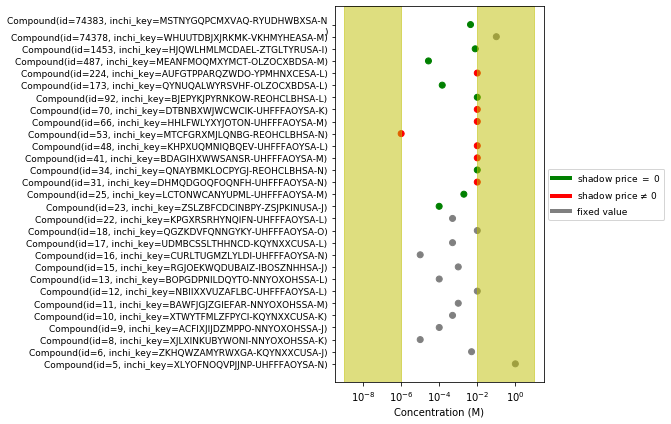

In [19]:
# MSer_mdf.compound_df.to_excel('MSerCyc_comp.xlsx')
Mser_comp_plot = MSer_mdf.compound_plot
# Mser_comp_plot.savefig('MSerCyc_comp.eps')

In [20]:
MSer_mdf.reaction_df

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,COCO:R00020,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1.0,-3.56 kilojoule / mole,-3.56 kilojoule / mole,-8.93 kilojoule / mole,2.500000e-01
1,COCO:R00021,"Compound(id=224, inchi_key=AUFGTPPARQZWDO-YPMH...",1.0,6.36 kilojoule / mole,6.36 kilojoule / mole,-8.93 kilojoule / mole,2.500000e-01
2,COCO:R00022,"Compound(id=9, inchi_key=ACFIXJIJDZMPPO-NNYOXO...",1.0,-6.59 kilojoule / mole,-6.59 kilojoule / mole,-8.93 kilojoule / mole,2.500000e-01
3,COCO:R00023,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.0,6.57 kilojoule / mole,6.57 kilojoule / mole,-8.93 kilojoule / mole,2.500000e-01
4,COCO:R00024,"Compound(id=53, inchi_key=MTCFGRXMJLQNBG-REOHC...",1.0,-28.96 kilojoule / mole,-46.07 kilojoule / mole,-20.45 kilojoule / mole,0.000000e+00
5,COCO:R00025,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.0,-2.21 kilojoule / mole,-19.32 kilojoule / mole,-15.94 kilojoule / mole,0.000000e+00
6,COCO:R00026,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",1.0,-39.04 kilojoule / mole,-39.04 kilojoule / mole,-18.49 kilojoule / mole,0.000000e+00
7,COCO:R00027,"Compound(id=13, inchi_key=BOPGDPNILDQYTO-NNYOX...",1.0,-26.60 kilojoule / mole,-26.60 kilojoule / mole,-21.20 kilojoule / mole,8.469843e-18
8,COCO:R00028,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1.0,-5.87 kilojoule / mole,-5.87 kilojoule / mole,-8.93 kilojoule / mole,0.000000e+00
9,COCO:R00029,"Compound(id=1453, inchi_key=HJQWLHMLMCDAEL-ZTG...",1.0,14.56 kilojoule / mole,-2.56 kilojoule / mole,-8.93 kilojoule / mole,0.000000e+00


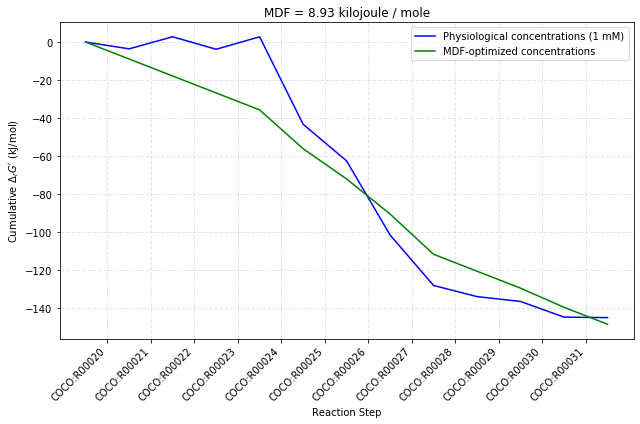

In [21]:
# MSer_mdf.reaction_df.to_excel('MSerCyc_Rxn.xlsx')
MSer_rxn_plt = MSer_mdf.reaction_plot
# MSer_rxn_plt.savefig('MSerCyc_Rxn.eps')

## 4 RuMP
formaldehyde to 1,3-bisphosphoglycerate

In [22]:
RuMP_rxns = pd.read_csv('RuMP_Rxns.csv')
RuMP_bounds = Bounds.from_csv('RuMP_comp_conc.csv')
RuMP_fluxes = np.array([3,3,1,1,1,1,1,1,2,1,1])

RuMPRxns = list(map(parse_reaction_formula, RuMP_rxns['RxnFormula']))
RuMP = Pathway(RuMPRxns,RuMP_fluxes, bounds=RuMP_bounds,p_h=p_h,ionic_strength=ionic,temperature=t)
RuMP_mdf = RuMP.calc_mdf()
print('RuMP cycle MDF:',RuMP_mdf.mdf)

RuMP cycle MDF:3.94 kilojoule / mole


In [23]:
RuMP_mdf.compound_df

,compound,concentration,shadow_price,lower_bound,upper_bound
0,"Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFA...",0.01 molar,0.000000,0.00 molar,0.01 molar
1,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",0.01 molar,0.000000,0.01 molar,0.01 molar
2,"Compound(id=10, inchi_key=XTWYTFMLZFPYCI-KQYNX...",0.00 molar,0.000000,0.00 molar,0.00 molar
3,"Compound(id=11, inchi_key=BAWFJGJZGIEFAR-NNYOX...",0.00 molar,0.003198,0.00 molar,0.00 molar
4,"Compound(id=12, inchi_key=NBIIXXVUZAFLBC-UHFFF...",0.01 molar,0.003198,0.01 molar,0.01 molar
5,"Compound(id=13, inchi_key=BOPGDPNILDQYTO-NNYOX...",0.00 molar,-0.003198,0.00 molar,0.00 molar
6,"Compound(id=56, inchi_key=WSFSSNUMVMOOMR-UHFFF...",0.00 molar,0.180655,0.00 molar,0.00 molar
7,"Compound(id=71, inchi_key=LXJXRIRHZLFYRP-VKHMY...",0.00 molar,0.000000,0.00 molar,0.01 molar
8,"Compound(id=74, inchi_key=GNGACRATGGDKBX-UHFFF...",0.00 molar,0.000000,0.00 molar,0.01 molar
9,"Compound(id=109, inchi_key=KTVPXOYAKDPRHY-SOOF...",0.00 molar,0.000000,0.00 molar,0.01 molar


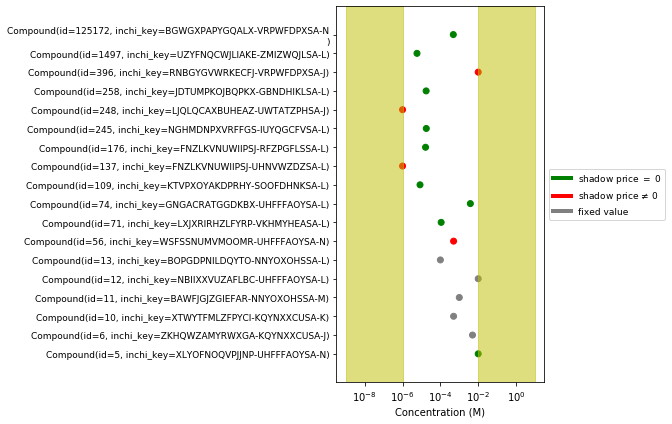

In [24]:
# RuMP_mdf.compound_df.to_excel('RuMP_comp.xlsx')
RuMP_comp_plot = RuMP_mdf.compound_plot
# RuMP_comp_plot.savefig('RuMP_comp.eps')

In [25]:
RuMP_mdf.reaction_df

,reaction_id,reaction_formula,flux,standard_dg_prime,physiological_dg_prime,optimized_dg_prime,shadow_price
0,COCO:R00032,"Compound(id=56, inchi_key=WSFSSNUMVMOOMR-UHFFF...",3,-26.45 kilojoule / mole,-9.34 kilojoule / mole,-3.94 kilojoule / mole,0.180655
1,COCO:R00033,"Compound(id=1497, inchi_key=UZYFNQCWJLIAKE-ZMI...",3,-14.21 kilojoule / mole,-14.21 kilojoule / mole,-3.94 kilojoule / mole,0.180655
2,COCO:R00034,"Compound(id=6, inchi_key=ZKHQWZAMYRWXGA-KQYNXX...",1,-18.82 kilojoule / mole,-18.82 kilojoule / mole,-16.17 kilojoule / mole,0.000000
3,COCO:R00035,"Compound(id=396, inchi_key=RNBGYGVWRKECFJ-VRPW...",1,21.66 kilojoule / mole,4.55 kilojoule / mole,-3.94 kilojoule / mole,0.046763
4,COCO:R00036,"Compound(id=71, inchi_key=LXJXRIRHZLFYRP-VKHMY...",1,10.13 kilojoule / mole,10.13 kilojoule / mole,-3.94 kilojoule / mole,0.090328
5,COCO:R00037,"Compound(id=245, inchi_key=NGHMDNPXVRFFGS-IUYQ...",1,0.70 kilojoule / mole,0.70 kilojoule / mole,-3.94 kilojoule / mole,0.090328
6,COCO:R00038,"Compound(id=71, inchi_key=LXJXRIRHZLFYRP-VKHMY...",1,3.82 kilojoule / mole,3.82 kilojoule / mole,-3.94 kilojoule / mole,0.090328
7,COCO:R00039,"Compound(id=109, inchi_key=KTVPXOYAKDPRHY-SOOF...",1,2.01 kilojoule / mole,2.01 kilojoule / mole,-3.94 kilojoule / mole,0.090328
8,COCO:R00040,"Compound(id=176, inchi_key=FNZLKVNUWIIPSJ-RFZP...",2,3.37 kilojoule / mole,3.37 kilojoule / mole,-3.94 kilojoule / mole,0.180655
9,COCO:R00041,"Compound(id=74, inchi_key=GNGACRATGGDKBX-UHFFF...",1,5.53 kilojoule / mole,5.53 kilojoule / mole,-3.94 kilojoule / mole,0.046763


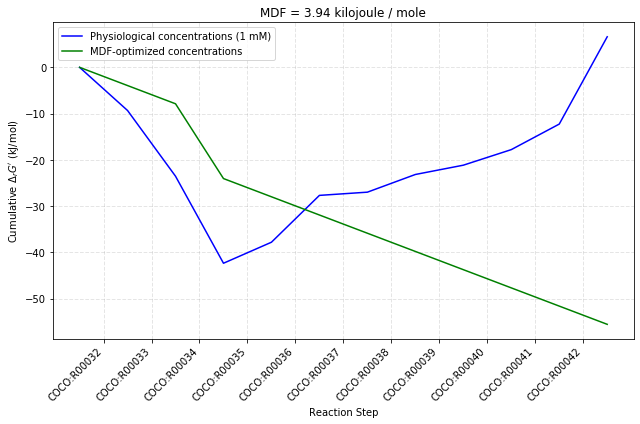

In [26]:
# RuMP_mdf.reaction_df.to_excel('RuMP_Rxn.xlsx')
RuMP_rxn_plt = RuMP_mdf.reaction_plot
# RuMP_rxn_plt.savefig('RuMP_Rxn.eps')

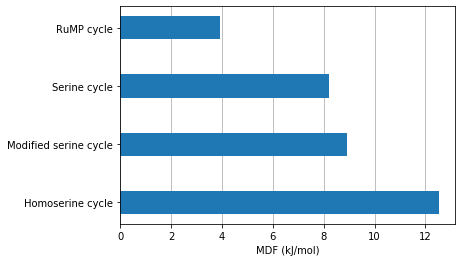

In [27]:
import matplotlib.pyplot as plt

psws = ['Homoserine cycle', 'Modified serine cycle', 'Serine cycle', 'RuMP cycle']
mdf_results = [HS_mdf.mdf.magnitude, MSer_mdf.mdf.magnitude, Ser_mdf.mdf.magnitude, RuMP_mdf.mdf.magnitude]

fig, ax = plt.subplots()
y_pos = np.arange(len(psws))
ax.set_yticks(y_pos)
ax.set_yticklabels(psws)
ax.barh(y_pos, mdf_results, height=0.4, align='center')
ax.set_xlabel('MDF (kJ/mol)')
ax.grid(True,axis='x')
ax.set_axisbelow(True)